In [38]:
import pandas as pd
import numpy as np

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("data_after_feature_engg.csv")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12444 entries, 0 to 12443
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    12444 non-null  int64  
 1   Facing                        12444 non-null  float64
 2   No_Bedroom                    12444 non-null  int64  
 3   No_Bathroom                   12444 non-null  float64
 4   No_Balcony                    12444 non-null  int64  
 5   Corner_Property               12444 non-null  int64  
 6   Furnishing                    12444 non-null  float64
 7   Price_in_Crore                12444 non-null  float64
 8   price_Per_Sqft_converted      12444 non-null  float64
 9   given_area_in_sqft            12444 non-null  int64  
 10  floor_number                  12444 non-null  int64  
 11  total_floors                  12444 non-null  int64  
 12  AreaType_Built-up Area        12444 non-null  int64  
 13  A

In [9]:
df.sample(3)

,Unnamed: 0,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,...,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,luxury_score,Text_info
5336,5336,3.0,3,3.0,4,0,2.0,3.80,19038.0,1996,...,0,0,1,0,0,0,4,62,113,"Conscient heritage one in sector-62, gurgaon i..."
9647,9647,0.0,3,3.0,4,1,2.0,3.75,22727.0,1650,...,0,1,1,1,0,0,2,113,106,M3m capital is one of the most popular destina...
2781,2781,1.0,3,3.0,4,0,3.0,1.83,9336.0,1960,...,0,0,0,0,0,1,4,82,76,Multiple flats available in all sizes. Call 99...


In [42]:
df.columns

Index(['Unnamed: 0', 'Facing', 'No_Bedroom', 'No_Bathroom', 'No_Balcony',
       'Corner_Property', 'Furnishing', 'Price_in_Crore',
       'price_Per_Sqft_converted', 'given_area_in_sqft', 'floor_number',
       'total_floors', 'AreaType_Built-up Area', 'AreaType_Carpet Area',
       'AreaType_Super Built-up Area', 'study room', 'servant room',
       'store room', 'pooja room', 'Overlooking_others',
       'Overlooking_main road', 'Overlooking_sea facing', 'Overlooking_club',
       'Overlooking_park/garden', 'Overlooking_pool',
       'Overlooking_lake facing', 'Overlooking_NA', 'flat_age', 'sector_num',
       'luxury_score', 'Text_info'],
      dtype='object')

# Facing

<Axes: xlabel='Facing'>

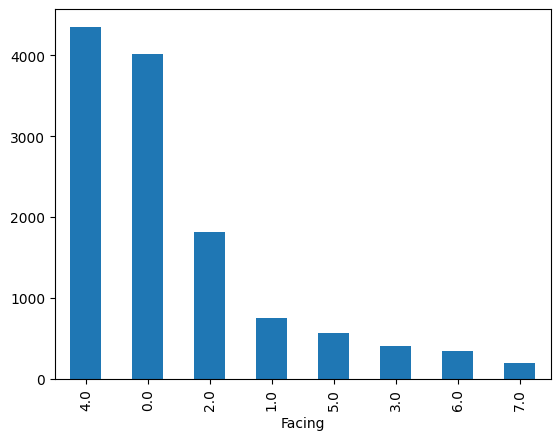

In [10]:
df['Facing'].value_counts().plot(kind='bar')

# No. of Bedrooms

<Axes: xlabel='No_Bedroom'>

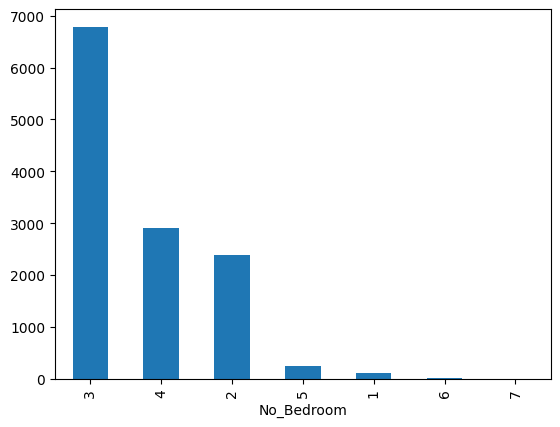

In [43]:
df['No_Bedroom'].value_counts().plot(kind='bar')

- Most of the flats having Bedrooms less than or equal to 4

# No_Bathroom

<Axes: xlabel='No_Bathroom'>

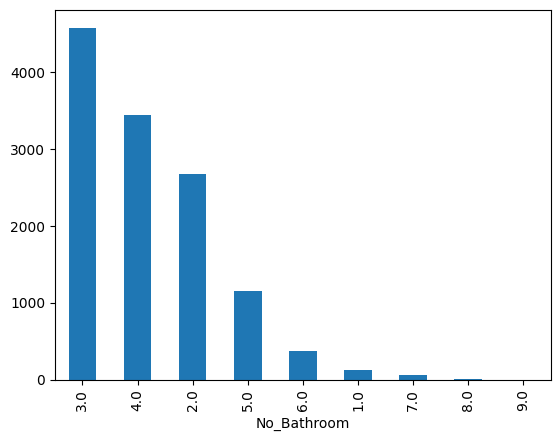

In [72]:
df['No_Bathroom'].value_counts().plot(kind='bar')

- Most of the flats having Bathroom less than or equal to 6

# No_Balcony

<Axes: xlabel='No_Balcony'>

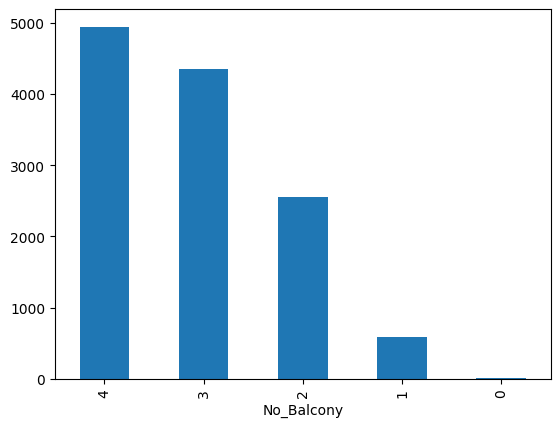

In [73]:
df['No_Balcony'].value_counts().plot(kind='bar')

# sector_num

In [11]:
df['sector_num'].value_counts().shape

(89,)

<Axes: xlabel='sector_num'>

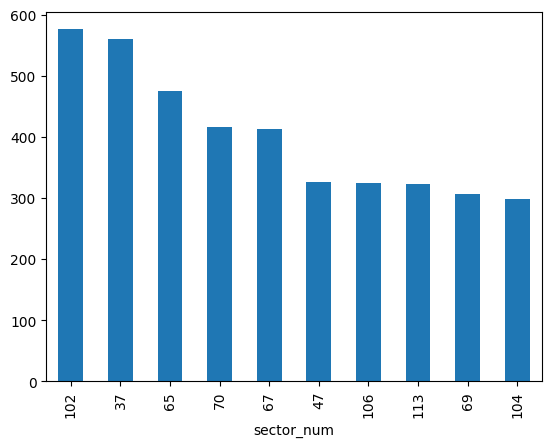

In [12]:

df['sector_num'].value_counts().head(10).plot(kind='bar')

In [13]:
# Frequency distribution for sectors
sector_counts = df['sector_num'].value_counts()

sector_frequency_bins = {
    "Very High (>400)": (sector_counts > 400).sum(),
    "High (200-400)": ((sector_counts >= 200) & (sector_counts <= 400)).sum(),
    "Average (50-200)": ((sector_counts >= 50) & (sector_counts < 200)).sum(),
    "Low (10-50)": ((sector_counts > 10) & (sector_counts < 50)).sum(),
    "Very Low (10)": (sector_counts <= 10).sum()
}

sector_frequency_bins

{'Very High (>400)': np.int64(5),
 'High (200-400)': np.int64(22),
 'Average (50-200)': np.int64(33),
 'Low (10-50)': np.int64(13),
 'Very Low (10)': np.int64(16)}

Observations

- There are a total of 89 unique sectors in the dataset.
- Frequency distribution of sectors:
- Very High (>400): 5 sectors have more than 400 listings.
- High (200-400): 22 sectors have between 200 to 400 listings.
- Average (50-200): A majority, 33 sectors, fall in this range with 50 to 200 listings each.
- Low (10-50): 13 sectors have between 10 to 50 listings.
- Very Low (<=10): 16 sectors have less than 10 listings.

# Price_in_Crore	

In [44]:
df['Price_in_Crore'].isnull().sum()

np.int64(0)

In [15]:
df['Price_in_Crore'].shape

(12444,)

In [46]:
df['Price_in_Crore'].describe()

count    12444.000000
mean         3.445464
std          4.086138
min          0.160000
25%          1.750000
50%          2.470000
75%          3.920000
max         85.000000
Name: Price_in_Crore, dtype: float64

<Axes: xlabel='Price_in_Crore', ylabel='Count'>

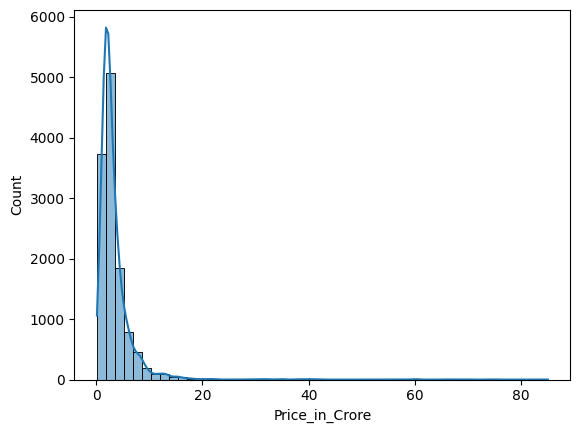

In [47]:
sns.histplot(df['Price_in_Crore'], kde=True, bins=50)

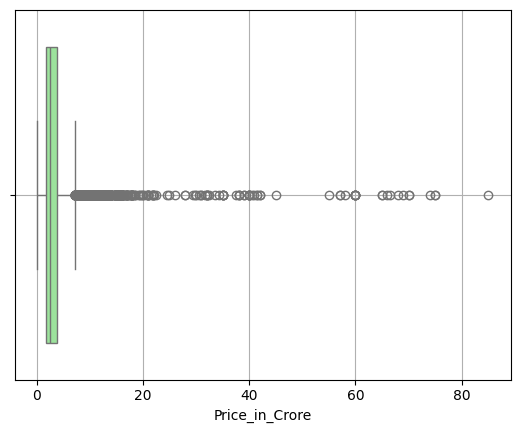

In [48]:
sns.boxplot(x=df['Price_in_Crore'], color='lightgreen')
plt.grid()

# Descriptive Statistics:


- Count: There are 12444 non-missing price entries.
- Mean Price: The average price is approximately 3.445464 crores.
- Median Price: The median (or 50th percentile) price is 2.470 crores.
- Standard Deviation: The prices have a standard deviation of 4.086138, indicating variability in the prices.
- Range: Prices range from a minimum of 0.16 crores to a maximum of 85 crores.
- IQR: The interquartile range (difference between 75th and 25th percentile) is from 1.75 crores to 3.92 crores.


# Visualizations:


- Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few      properties going beyond 10 crores.

- Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.



In [49]:
# Skewness and Kurtosis
skewness = df['Price_in_Crore'].skew()
kurtosis = df['Price_in_Crore'].kurt()

print(skewness,kurtosis)

8.608318751860716 113.6175504046541


`Skewness`: The price distribution has a skewness of approximately 8.608, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.


`Kurtosis`: The kurtosis value is approximately 113.617. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [50]:
# Quantile Analysis
quantiles = df['Price_in_Crore'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.4900
0.05     0.8000
0.95     8.5000
0.99    15.7328
Name: Price_in_Crore, dtype: float64

In [51]:
# Identify potential outliers using IQR method
Q1 = df['Price_in_Crore'].describe()['25%']
Q3 = df['Price_in_Crore'].describe()['75%']
IQR = Q3 - Q1

IQR

np.float64(2.17)

In [52]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.505 7.175


In [53]:
outliers = df[(df['Price_in_Crore'] < lower_bound) | (df['Price_in_Crore'] > upper_bound)]
outliers.shape

(930, 31)

In [55]:

skewness = outliers['Price_in_Crore'].skew()
kurtosis = outliers['Price_in_Crore'].kurt()

print(skewness,kurtosis)

3.9171486808700506 17.050931618029825


In [54]:
outliers['Price_in_Crore'].describe()

count    930.000000
mean      12.705439
std       10.233964
min        7.200000
25%        8.010000
50%        9.225000
75%       12.900000
max       85.000000
Name: Price_in_Crore, dtype: float64

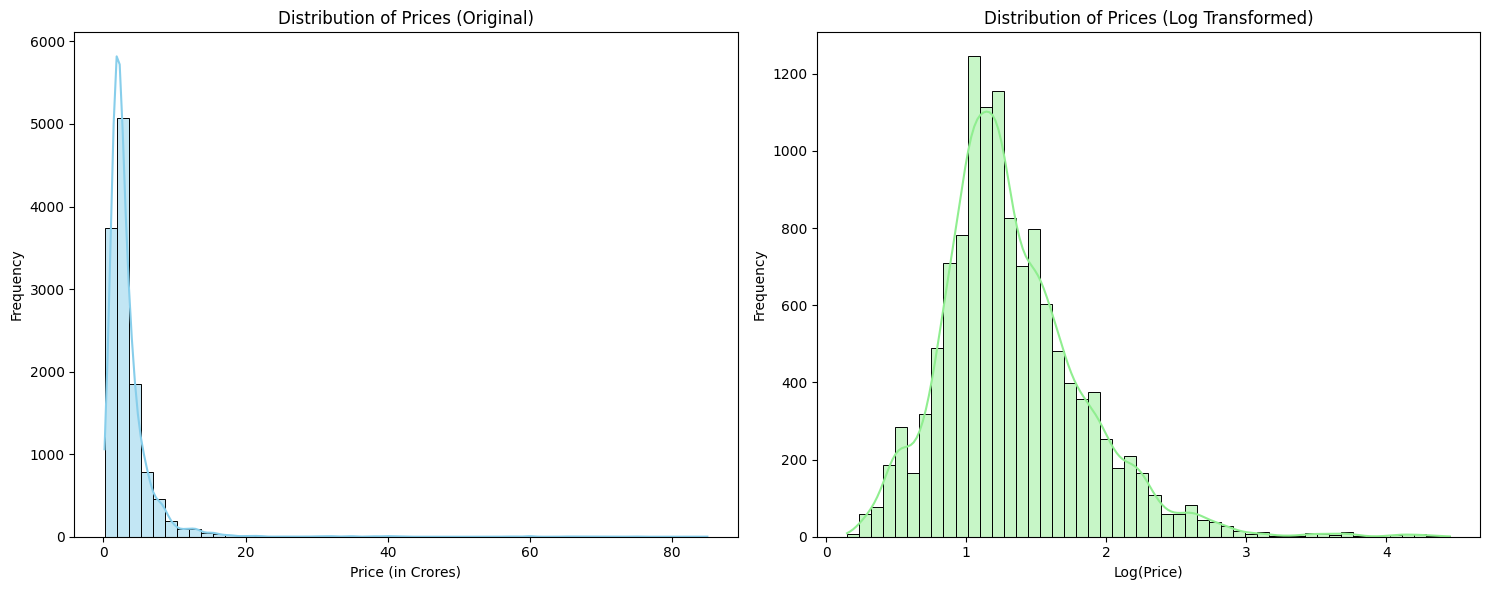

In [56]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Price_in_Crore'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['Price_in_Crore']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [29]:
skewness = np.log1p(df['Price_in_Crore']).skew()
kurtosis = np.log1p(df['Price_in_Crore']).kurt()

print(skewness,kurtosis)

1.0859631985400962 2.835123703575349


In [59]:
mean1 = np.log1p(df['Price_in_Crore']).mean()
std1 = np.log1p(df['Price_in_Crore']).std()
median1 = np.log1p(df['Price_in_Crore']).median()
print(mean1,std1 , median1)

1.3281818616052292 0.5076257228745681 1.244154593958768


In [60]:
mean2 = np.log(df['Price_in_Crore'] + 10).mean()
std2 = np.log1p(df['Price_in_Crore'] + 10).std()
median2 = np.log1p(df['Price_in_Crore'] + 10).median()
print(mean2 ,std2 , median2)

2.5749468421479986 0.18168882759073782 2.6004649904222727


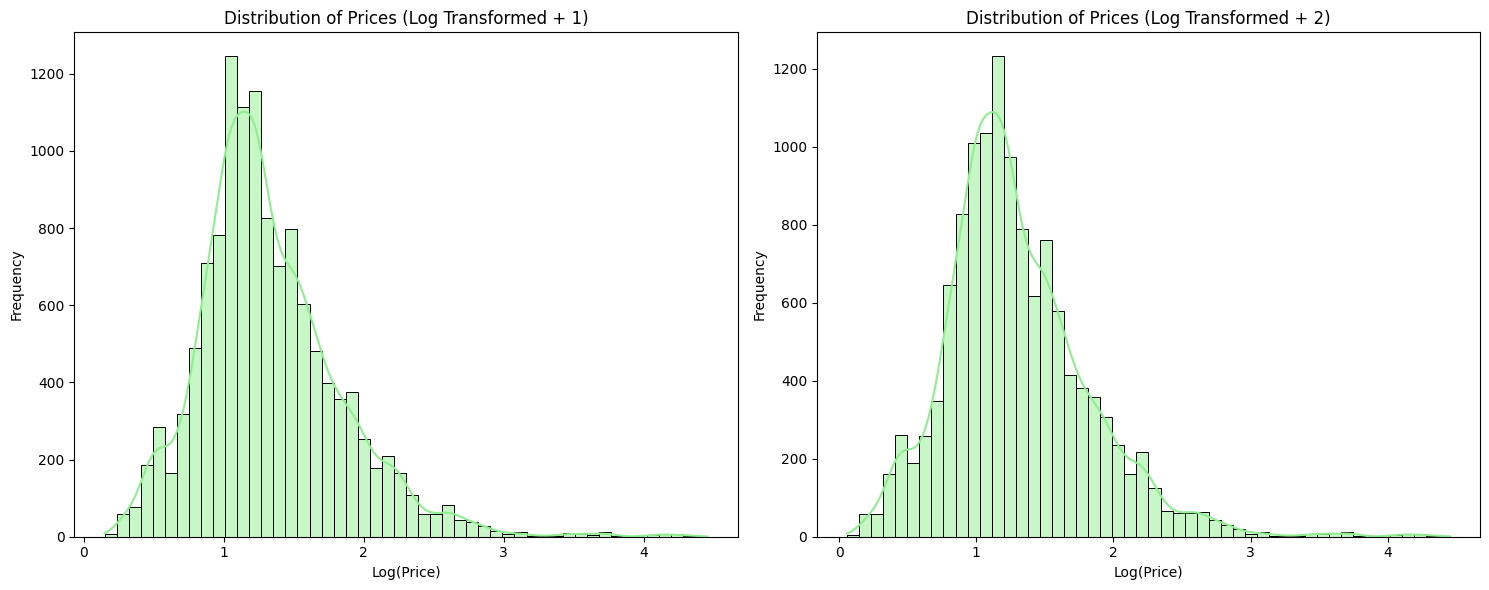

In [65]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(df['Price_in_Crore']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed + 1)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log(df['Price_in_Crore'] + 0.9), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed + 2)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

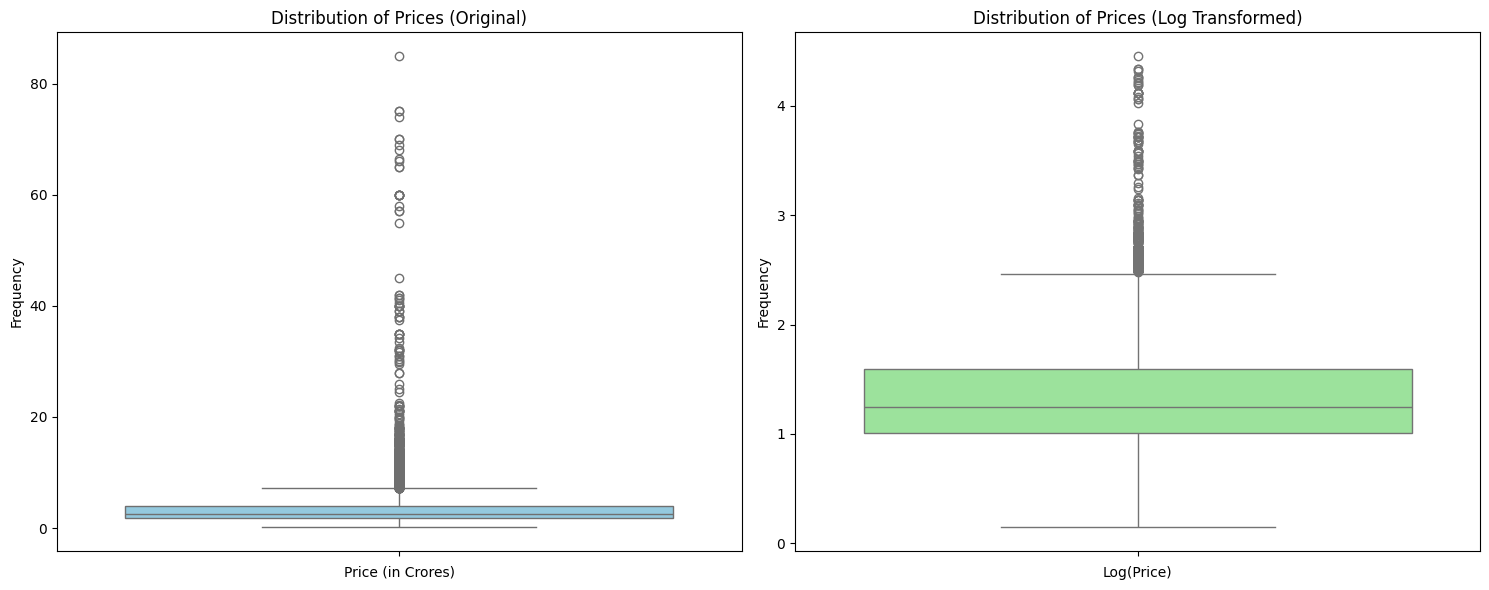

In [66]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['Price_in_Crore'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['Price_in_Crore']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# price_Per_Sqft_converted	

In [67]:
df['price_Per_Sqft_converted'].sample(4)

4920     11301.0
11843     8750.0
4756      8912.0
5797     10613.0
Name: price_Per_Sqft_converted, dtype: float64

In [68]:
df['price_Per_Sqft_converted'].describe()

count    1.244400e+04
mean     3.219609e+04
std      1.824289e+05
min      1.130000e+02
25%      1.054100e+04
50%      1.352900e+04
75%      1.784200e+04
max      3.673527e+06
Name: price_Per_Sqft_converted, dtype: float64

<Axes: xlabel='price_Per_Sqft_converted', ylabel='Count'>

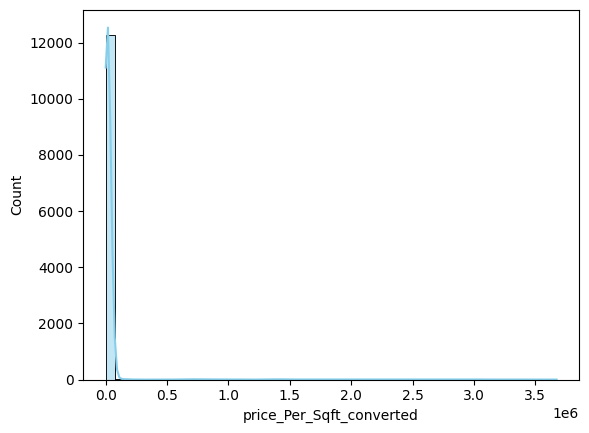

In [69]:
sns.histplot(df['price_Per_Sqft_converted'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='price_Per_Sqft_converted'>

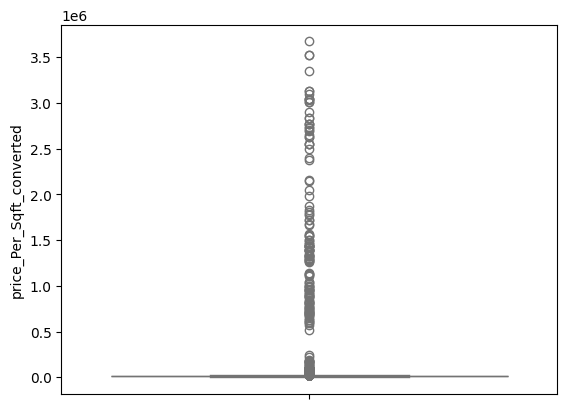

In [70]:
sns.boxplot(df['price_Per_Sqft_converted'], color='lightgreen')

In [74]:
df.columns


Index(['Unnamed: 0', 'Facing', 'No_Bedroom', 'No_Bathroom', 'No_Balcony',
       'Corner_Property', 'Furnishing', 'Price_in_Crore',
       'price_Per_Sqft_converted', 'given_area_in_sqft', 'floor_number',
       'total_floors', 'AreaType_Built-up Area', 'AreaType_Carpet Area',
       'AreaType_Super Built-up Area', 'study room', 'servant room',
       'store room', 'pooja room', 'Overlooking_others',
       'Overlooking_main road', 'Overlooking_sea facing', 'Overlooking_club',
       'Overlooking_park/garden', 'Overlooking_pool',
       'Overlooking_lake facing', 'Overlooking_NA', 'flat_age', 'sector_num',
       'luxury_score', 'Text_info'],
      dtype='object')

# given_area_in_sqft

In [75]:
df[['given_area_in_sqft',  'AreaType_Built-up Area', 'AreaType_Carpet Area', 'AreaType_Super Built-up Area']]

,given_area_in_sqft,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area
0,690,0,0,1
1,690,0,0,1
2,836,0,0,1
3,1260,0,0,1
4,1366,0,0,1
...,...,...,...,...
12439,1790,0,0,1
12440,1805,0,0,1
12441,1999,0,0,1
12442,2383,0,0,1


In [76]:
df['given_area_in_sqft'].describe()

count    12444.000000
mean      2201.949132
std       1389.894247
min        250.000000
25%       1550.000000
50%       1950.000000
75%       2505.000000
max      59115.000000
Name: given_area_in_sqft, dtype: float64

Text(0, 0.5, 'count')

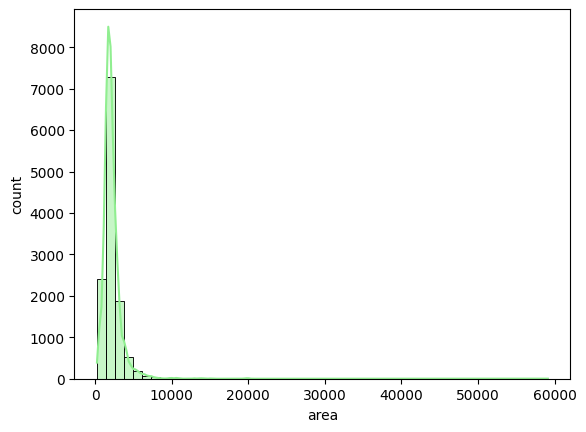

In [78]:
sns.histplot(df['given_area_in_sqft'], kde=True, bins=50, color='lightgreen')

plt.xlabel('area')
plt.ylabel('count')

# luxury_score

In [79]:
df['luxury_score'].describe()

count    12444.000000
mean       119.556815
std         46.919071
min          0.000000
25%         80.000000
50%        118.000000
75%        164.000000
max        189.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

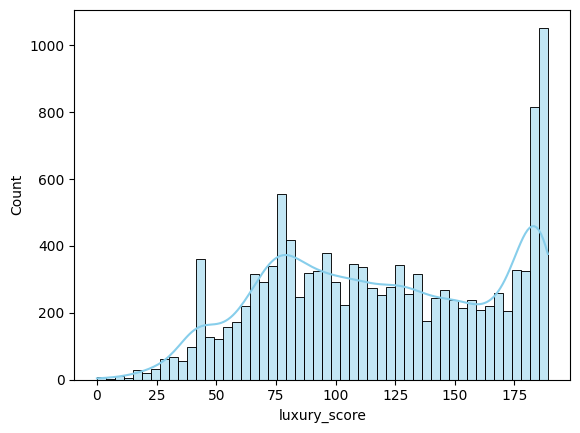

In [81]:
sns.histplot(df['luxury_score'] , bins=50 , color = 'skyblue', kde = True)

<Axes: ylabel='luxury_score'>

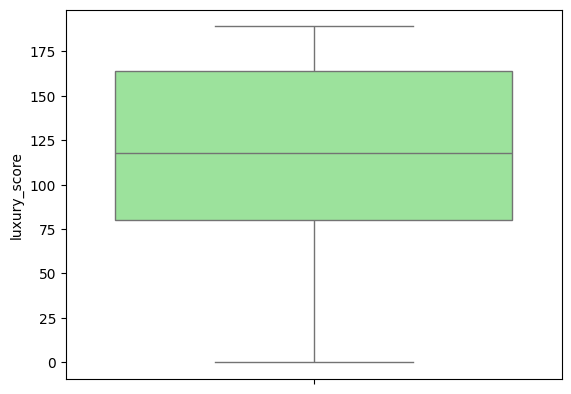

In [82]:
sns.boxplot(df['luxury_score'], color='lightgreen')

In [84]:
df.head(2)

,Unnamed: 0,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,...,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,luxury_score,Text_info
0,0,1.0,2,2.0,1,0,3.0,0.61,8840.0,690,...,0,0,1,0,0,0,3,90,88,"Green court society, which is bang on 60-Meter..."
1,1,3.0,2,2.0,1,0,3.0,0.70,10144.0,690,...,0,0,1,0,0,0,3,90,83,"Green court society, which is bang on 60-Meter..."


# floor_number

<Axes: ylabel='Count'>

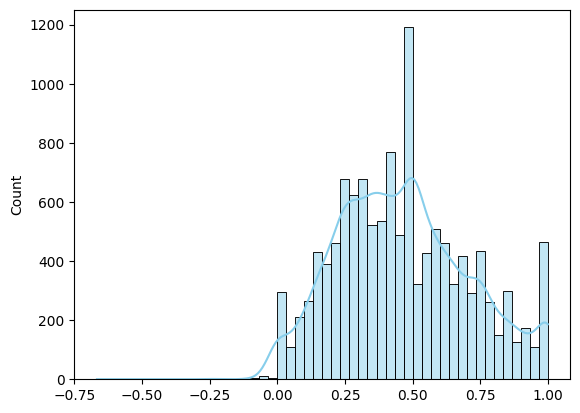

In [86]:
sns.histplot((df['floor_number']/df['total_floors']) , bins=50 , color = 'skyblue', kde = True)